In [24]:
##importing a few general use case libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit

import warnings
warnings.filterwarnings('ignore')

In [8]:
import pathlib 
import os
import  shutil

dir_path= pathlib.Path.cwd()
print(dir_path)
def read_file():
    dir_folder= pathlib.Path.cwd().parent
    input_path = dir_folder/ "data" / "diabetes"
    file_name = "diabetes.csv"
    df= pd.read_csv(os.path.join(input_path,file_name))
    return df

df = read_file()


c:\Abdelouaheb\perso\Ph\machine_learning_pipeline\diabetes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
# Data shape and Variable types
#print(df.head())
print("#"*50)
print(df.info())


##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [13]:
# Missing values count
df.isnull().sum()
# Missing values percentage
round(df.isnull().sum()/df.shape[0],2)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [20]:
# Balanced or Unbalanced data 
round(df["Outcome"].value_counts()/df.shape[0]*100,0).astype(int).astype(str) + "%"

Outcome
0    65%
1    35%
Name: count, dtype: object

In [22]:
# univarie analysis 
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


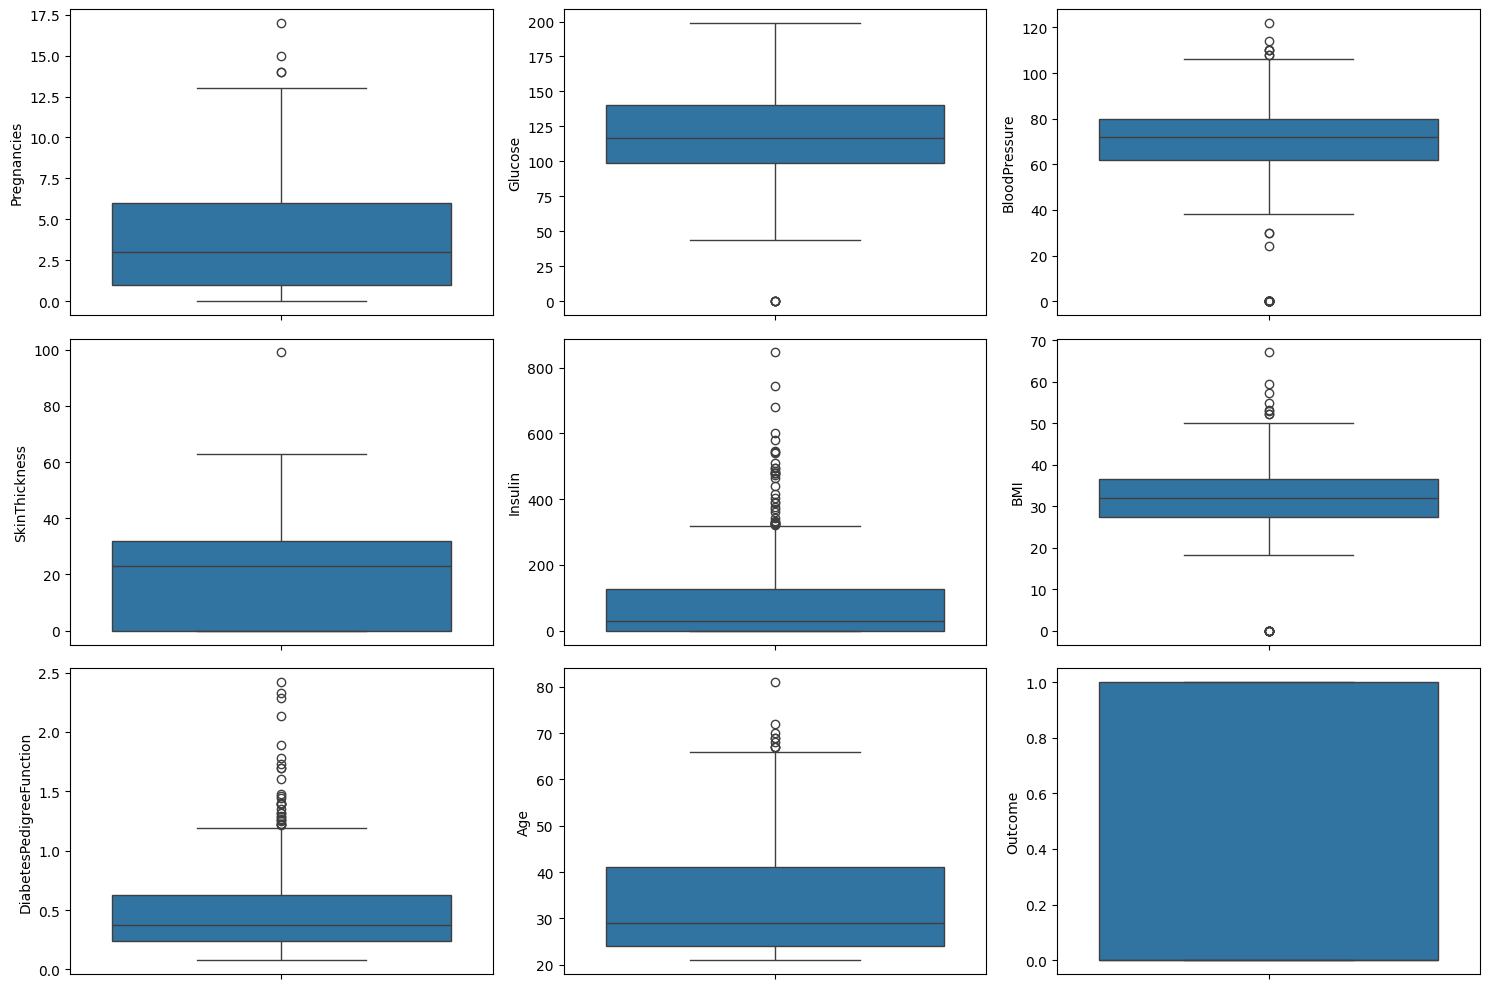

In [25]:
# Outliers
import seaborn as sns 
fig, axes = plt.subplots(3,3, figsize=(15,10))
for i, col in enumerate(df.columns):
    row, col_position = divmod(i,3)
    sns.boxplot(data=df,y=col,ax=axes[row, col_position])
    plt.tight_layout()
plt.show()


In [28]:
# importing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

In [29]:
# Lets calculate mutual information then move on to visualize correlation and mutual information

tdf=df.copy()  
x=tdf.drop(columns='Outcome')
y=tdf['Outcome']
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature':x.columns,'Mutual Information':mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

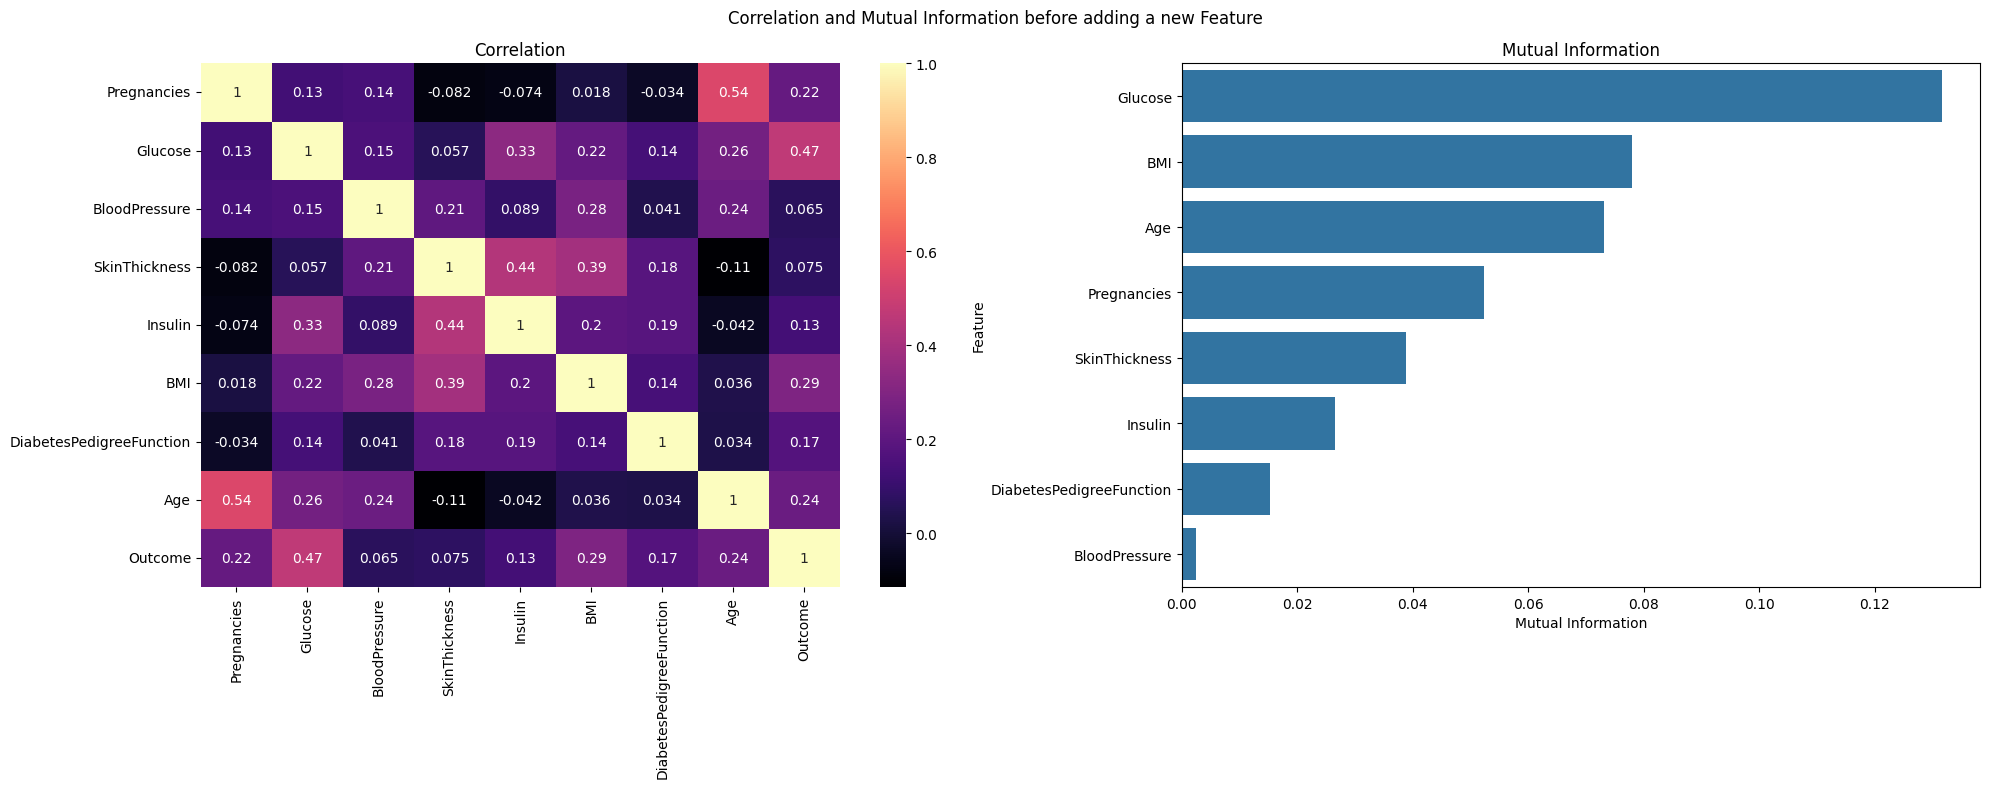

In [31]:
fig,ax=plt.subplots(1,2,figsize=(20,8))
sns.heatmap(df.corr(),annot=True,cmap='magma',ax=ax[0])
ax[0].set_title('Correlation')
sns.barplot(x='Mutual Information',y='Feature', data=mi_df,ax=ax[1])
ax[1].set_title('Mutual Information')
plt.suptitle('Correlation and Mutual Information before adding a new Feature')
plt.tight_layout()
plt.show()